In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import pytae as pt

df = pd.DataFrame({
    'Category': ['A','B','C','C'],
    'Value': [10, 20, 30, 40],
    'Group': ['G1', 'G1', 'G2', 'G2']
})

df['Group']=pd.Categorical(df['Group'], categories=['G2','G1'],ordered=True)

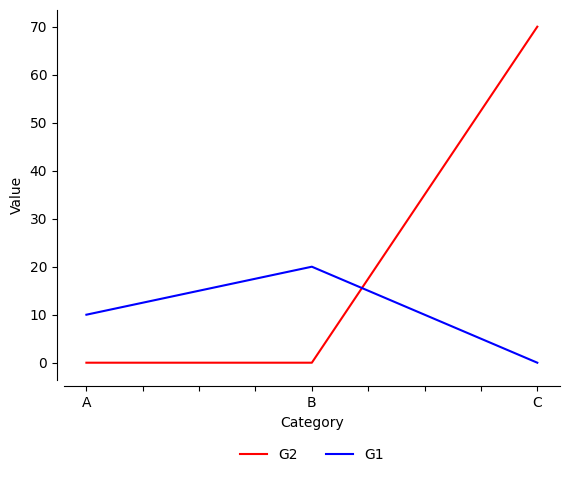

In [28]:
#does not support scatter yet
fig, ax = plt.subplots()
df.plot_x(ax=ax, x='Category', y='Value',by='Group',xlabel='Category',
          color={'G1':'blue', 'G2':'red'},aggfunc='sum')
plt.show()

Group Category  G2  G1
0            A   0  10
1            B   0  20
2            C  70   0


<Axes: xlabel='Category', ylabel='Value'>

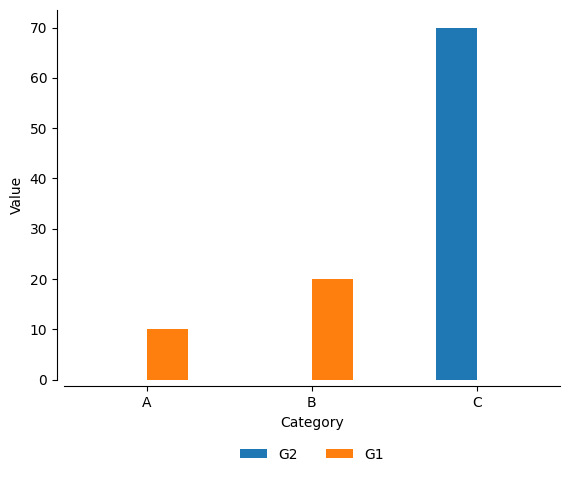

In [29]:
fig, ax = plt.subplots()
df.plot_x(ax=ax, x='Category', y='Value',by='Group',kind='bar',print_data=True,clip_data=False)

Python(49166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


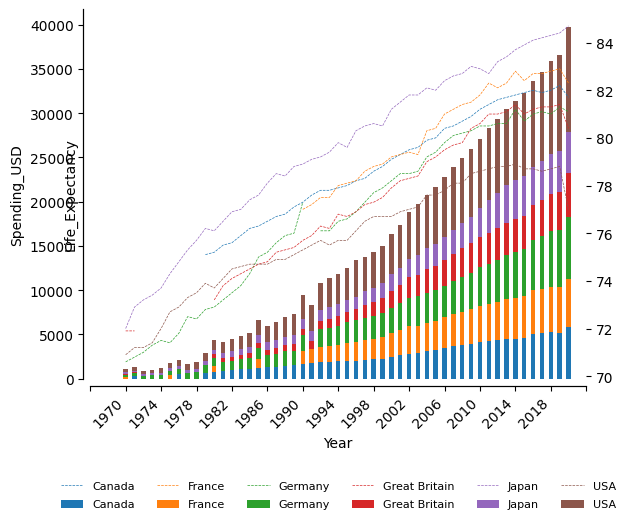

In [30]:
#A little more elaborate example

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pytae as pt
import seaborn as sns

h= sns.load_dataset("healthexp")
# h=h[h['Country']=='Germany']

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.clear()
ax2.clear()
h.plot_x(ax=ax,x='Year',y='Spending_USD',by='Country',kind='bar',stacked=True)
h.plot_x(ax=ax2,clip_data=True,x='Year',y='Life_Expectancy',by='Country',kind='line',
         linewidth=0.5,linestyle='--')

# Set locator to show every fourth label
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add legends
h, l = ax.get_legend_handles_labels()
ax.legend(h, l, bbox_to_anchor=(0.5, -0.3), ncol=10, frameon=False, loc='upper center', fontsize=8)

h, l = ax2.get_legend_handles_labels()
ax2.legend(h, l, bbox_to_anchor=(0.5, -0.25), ncol=10, frameon=False, loc='upper center', fontsize=8)
# Show plot
plt.show()

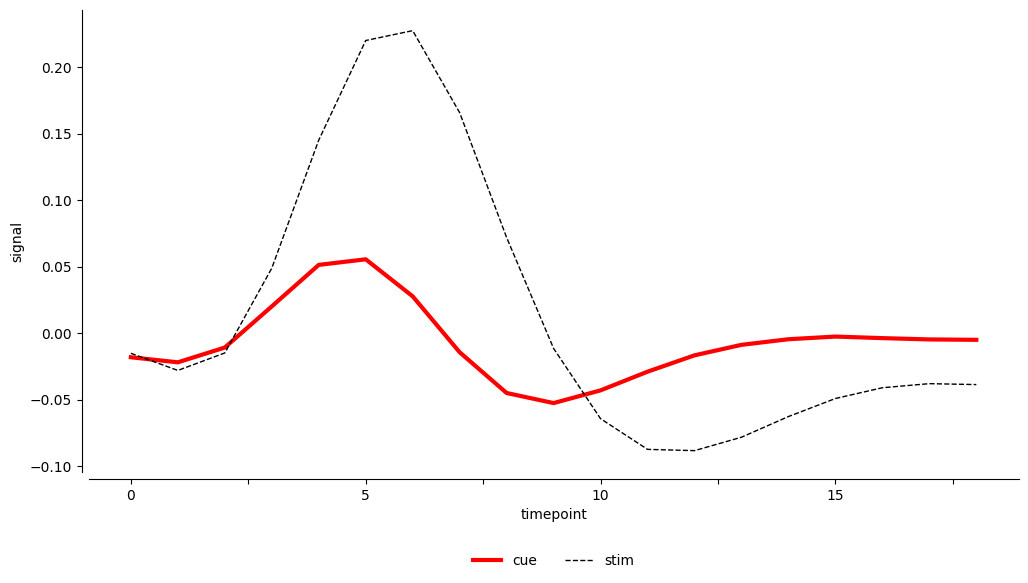

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns

# Assuming your plot_x function and customize_spines method are already defined

# Load the fmri dataset
fmri = sns.load_dataset('fmri')
fmri

# Plot the data using the plot_x function
fig, ax = plt.subplots(figsize=(12, 6))
plt.close()

color={'cue':'red','stim':'black'}
style={'cue':'-','stim':'--'}
width={'cue':3,'stim':1}


fmri.plot_x(ax=ax, x='timepoint', y='signal', by='event', kind='line',aggfunc='mean',
            style=style,color=color,width=width)


# Show the plot
fig

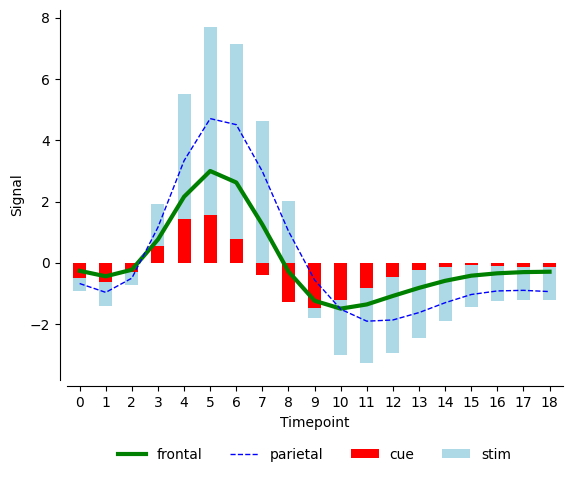

In [32]:
color={'cue':'red','stim':'lightblue','frontal':'green','parietal':'blue'}
style={'cue':'-','stim':'--'}
width={'cue':3,'stim':1}

fig, ax = plt.subplots()
plt.close()
fmri.plot_x(x='timepoint',y='signal',by='region',aggfunc='sum',
            ax=ax,
            color=color,
            style=style,
            width=width
           )
fmri.plot_x(x='timepoint',y='signal',by='event',
            aggfunc='sum',kind='bar',ax=ax,stacked=True
           ,xlabel='Timepoint',ylabel='Signal',color=color)
fig